Name: Advik Maniyar <br>
Roll: 42244

In [8]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
y_test.shape

(10000,)

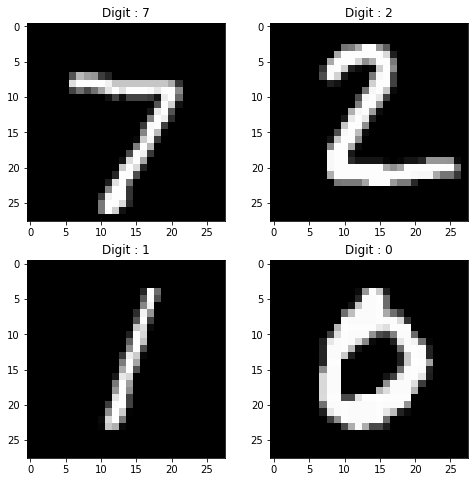

In [12]:
plt.figure(figsize = (8,8))
plt.gray()
for i in range(4):
  plt.subplot(2, 2, i + 1)
  plt.imshow(x_test[i])
  plt.title(f"Digit : {y_test[i]}")

In [13]:
# Normalize
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')
x_train /= 255
x_test /= 255

In [14]:
# Flatten input image
pixels  = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], pixels)
x_test = x_test.reshape(x_test.shape[0], pixels)
# one hot encode output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
model = tf.keras.Sequential([
    tfl.Dense(pixels, activation = 'relu'),
    tfl.Dense(10, activation = 'softmax')
])
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
epochs = 5
batch_size = 128
model_history = model.fit(x = x_train, y = y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0614 - accuracy: 0.9814
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0417 - accuracy: 0.9876
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0293 - accuracy: 0.9914
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0213 - accuracy: 0.9942
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0147 - accuracy: 0.9963


In [23]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0626 - accuracy: 0.9807


[0.06263864040374756, 0.9807000160217285]

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 784)               615440    
                                                                 
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [25]:
! pip install graphviz
! pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=c494443721657259ed880b5639461580630901650067bddb4c7ad1a9a3e2b0f9
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


In [26]:
from ann_visualizer.visualize import ann_viz

In [31]:
ann_viz(model = model, view = True, title = "MNIST Neural Net")